# Kepler's third law of planetary motion

If we try to follow Johannes Kepler and plot the orbital period of the planets against their average distance from the sun, we don't get a straight line. We get a curve.

<Axes: xlabel='distance from Sun', ylabel='orbital_period'>

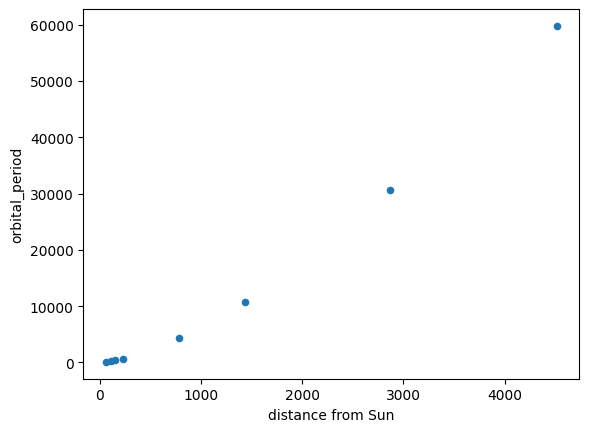

In [6]:
import pandas as pd

planets = pd.read_csv("planets.csv")
df = pd.DataFrame({"orbital_period": planets["Orbital Period (days)"], "distance from Sun": planets["Distance from Sun (10^6 km)"]})
df.plot.scatter(x="distance from Sun", y="orbital_period")

A modern way to "iron out" this curve is to take `logarithms` of the data. `Logarithms`, or `logs`, is a fairly large topic. As a brief summary...

We can calculate that  `10**4 = 10000`

Given the number `10000`, someone may ask "What power of 10 makes 10000?" 

With a calculator, we can answer that by doing `log(10000)` to get the answer `4`

So, in a sense, `logarithms` undo powers. There is more to know, such as which base we are working in. The above was in base `10`, but a common alternative is the `natural logarithm` which is in a different base. Most calculators will mean base `10` when they say `log`, and `natural logarithm` when they say `ln`. But python means `natural logarithm` when it says `log` (although you can add a base parameter - read the documentation).


# Impact on interpreting data

Well let's take a look at it first. We promised to "iron out" the curve.

log(period) = 1.497808123478106log(distance) + -1.6005189858872277


<Axes: title={'center': "log of planet's distance against log of length of orbit"}, xlabel='log_distance_from_Sun', ylabel='log_orbital_period'>

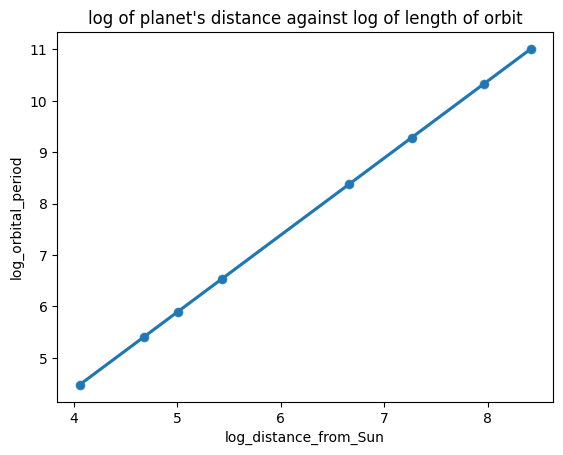

In [7]:
import math
import seaborn as sns
import numpy as np

dists = pd.Series(planets["Distance from Sun (10^6 km)"])
log_dists = [math.log(float(d)) for d in dists]

periods = pd.Series(planets["Orbital Period (days)"])
log_periods = [math.log(float(p)) for p in periods]

a, b = np.polyfit(log_dists, log_periods, 1)
print("log(period) = {}log(distance) + {}".format(a, b))

df = pd.DataFrame({"log_orbital_period": log_periods, "log_distance_from_Sun": log_dists})
df.plot.scatter(x = "log_distance_from_Sun", y = "log_orbital_period", title="log of planet's distance against log of length of orbit")
sns.regplot(x=log_dists, y=log_periods)

Yes, that looks like a straight line. 

And it can lead us to the conclusion that some powers or other of our data is proportional (meaning, they would also produce a straight line). The maths involved in making use of this to work out the powers requires knowing a bit more about `logarithms`. But there is a clue in the gradient of our line, with is about `1.5 = 3/2`

I'm going to cube the distances and square the periods. Call it magic for now.

correlation coefficient:  0.9999844289436723


<Axes: title={'center': "cube of planet's distance against square of length of orbit"}>

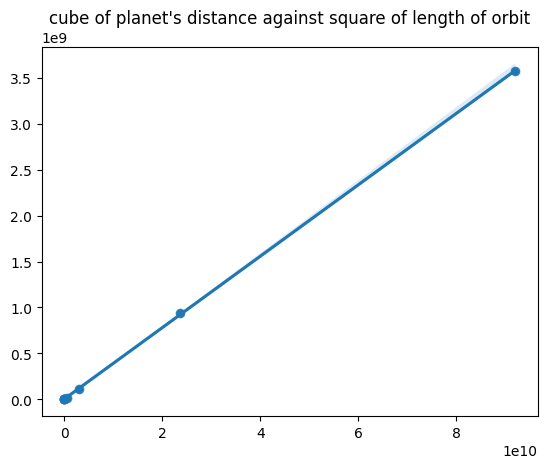

In [8]:
# Use if you want distances in astronomical units
# dist_earth2sun = dists[2]
# print("dist earth to sun", dist_earth2sun)
# dists2 = [d/dist_earth2sun for d in dists]


cube_dists = pd.Series([d**3 for d in dists])
square_periods = pd.Series([p**2 for p in periods])

print("correlation coefficient: ", cube_dists.corr(square_periods))

df = pd.DataFrame({"Square of orbital period": square_periods, "cube of distance to sun": cube_dists})
df.plot.scatter(x = "cube of distance to sun", y = "Square of orbital period", title="cube of planet's distance against square of length of orbit")
sns.regplot(x=cube_dists, y=square_periods, )

We get another straight line and have gone some way to show the data follows [Kepler's third law on planetary motion](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion). (There does still seem to be a problem, if you consider what the formula for line of best fit gives for the orbital period of a plant at distance 0. But this article was intended as an introduction to why we use logarithms).